# Veränderungen der Geburtenrate zwischen 1950 und 2023

Gruppe: Lia Müller, Selina Rüdisüli, Melanie Pomellitto

Fragen
- In welchen Jahren ist die Geburtenrate bemerkenswert gestiegen oder gesunken?
- Welche Ursprünge veranlassen die Veränderungen?

Quelle: https://ourworldindata.org/grapher/crude-birth-rate?tab=table


## 1. Daten beschaffen und laden

In [162]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [163]:
# loading the data
df = pd.read_csv('crude-birth-rate.csv', skiprows=1,
                names=['Entity','Code','Year','Birth rate per 1000 population'])
df.head()

,Entity,Code,Year,Birth rate per 1000 population
0,Afghanistan,AFG,1950,49.380
1,Afghanistan,AFG,1951,49.624
2,Afghanistan,AFG,1952,49.784
3,Afghanistan,AFG,1953,49.979
4,Afghanistan,AFG,1954,50.004


## 2. Daten vorbereiten

- Vor dem Herunterladen der Daten von "Ourworldindata" haben wir die Daten der "Welt", "Kontinente" sowie auch der "Gebiete" aussortiert, um      Doppelzählungen zu vermeiden.
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert ein Jahr (Year) und die Zeilen sind die verschiedenen Ethnien (Entity) - in alphabetischer Reihenfolge.
- In unserem Beispiel werden folgende Datentypen gebraucht:

In [164]:
df_pivot = df.pivot(index='Entity', columns='Year', values= 'Birth rate per 1000 population')
df_pivot.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,49.380,49.624,49.784,49.979,50.004,50.156,50.279,50.306,50.424,50.456,...,39.646,39.364,38.732,38.171,37.624,37.138,36.601,36.342,36.045,35.437
Albania,39.298,39.659,39.790,40.692,41.433,41.913,41.605,41.113,41.427,41.518,...,13.071,12.431,11.873,11.416,10.898,10.757,10.536,10.512,10.305,10.244
Algeria,50.602,50.284,49.961,49.746,49.666,49.625,49.516,49.404,49.397,49.114,...,26.063,25.811,25.439,25.015,24.063,23.379,22.430,21.392,20.491,19.625
Andorra,15.345,16.850,16.899,16.663,15.891,15.931,16.460,17.343,18.255,19.212,...,8.973,9.132,8.432,7.831,7.159,6.993,6.831,6.828,6.850,6.859
Angola,44.290,45.015,46.163,47.224,48.186,49.037,49.771,50.387,50.891,51.295,...,42.503,41.847,41.183,40.595,40.057,39.539,39.127,38.670,38.102,37.588


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Entity* (Ethnien) enthält 201 verschiedene Ethnien
- Die Spalte *Codes* inkludiert ebenfalls 201 verschiedene Codes 
- Es sind diskrete Daten zwischen 1950 und 2023 vorhanden. Der Datensatz beeinhaltet 74 Jahre. Zu jedem Jahr sind gleich viele Daten verfügbar, weshalb der Datensatz seit Beginn der Aufzeichnung 1950 komplett ist.
- Die Geburtenrate streut zwischen 4'211 (Minimum) und 58'627 (Maximum) pro 1000 Population. 
- Klassen:

In [165]:
df.dtypes

Entity                             object
Code                               object
Year                                int64
Birth rate per 1000 population    float64
dtype: object

### 3.1 Analyse Ethnien

In [166]:
print('Anzahl verschiedener Ethnien: ', len(df['Entity'].unique()))

Anzahl verschiedener Ethnien:  201


In [167]:
# Anzahl Datenpunkte pro Ethnie
df['Entity'].value_counts()

Entity
Afghanistan    74
Panama         74
Nicaragua      74
Niger          74
Nigeria        74
               ..
Greece         74
Greenland      74
Grenada        74
Guatemala      74
Zimbabwe       74
Name: count, Length: 201, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Ethnie'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

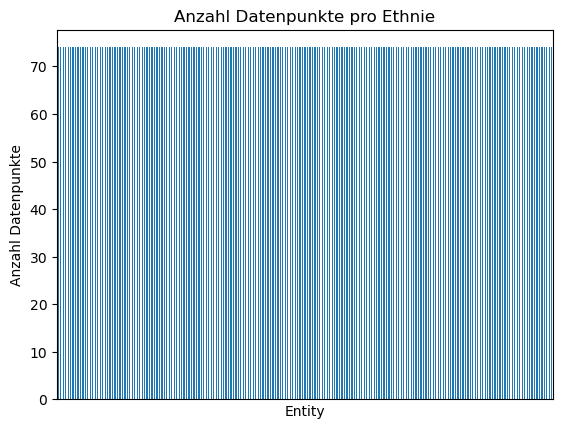

In [168]:
df['Entity'].value_counts().plot(kind='bar',
                                 xticks=[],         # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Ethnie')

### 3.2 Analyse Codes

In [169]:
print('Anzahl verschiedener Codes:  ', len(df['Code'].unique()))

Anzahl verschiedener Codes:   201


In [170]:
# Anzahl Datenpunkte pro Code
df['Code'].value_counts()

Code
AFG    74
PAN    74
NIC    74
NER    74
NGA    74
       ..
GRC    74
GRL    74
GRD    74
GTM    74
ZWE    74
Name: count, Length: 201, dtype: int64

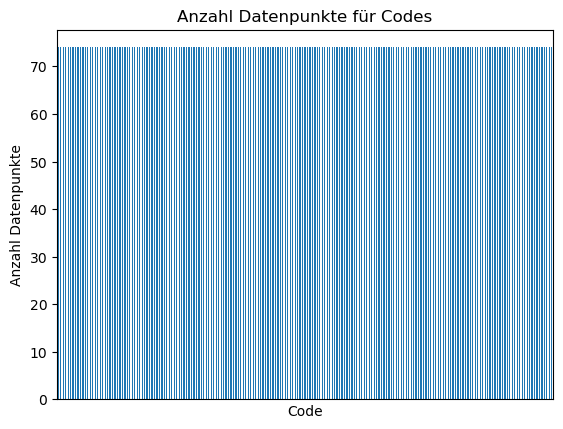

In [171]:
df['Code'].value_counts().plot(kind='bar', xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte für Codes');

### 3.3 Vergleich Anzahl Datenpunkte der Codes und Ethnien

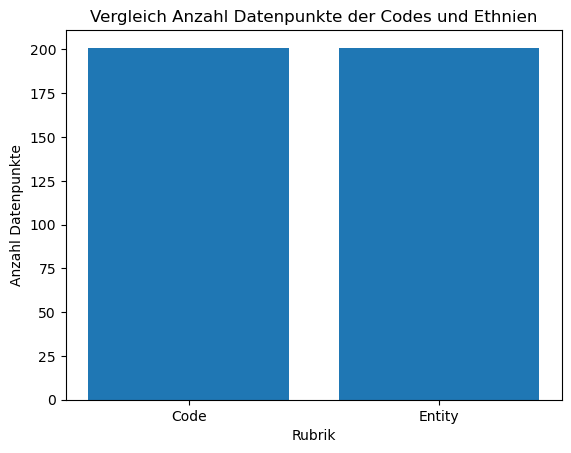

In [172]:
anzahl_codes = df['Code'].nunique()
anzahl_ethnien = df['Entity'].nunique()
plt.bar(['Code', 'Entity'], [anzahl_codes, anzahl_ethnien])
plt.xlabel('Rubrik')
plt.ylabel('Anzahl Datenpunkte')
plt.title('Vergleich Anzahl Datenpunkte der Codes und Ethnien')
plt.show()

### 3.4 Analyse Jahr (Year)

In [173]:
print('Anzahl verschiedener Jahre: ', len(df['Year'].unique()))

Anzahl verschiedener Jahre:  74


In [174]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
1950    201
1951    201
1952    201
1953    201
1954    201
       ... 
2019    201
2020    201
2021    201
2022    201
2023    201
Name: count, Length: 74, dtype: int64

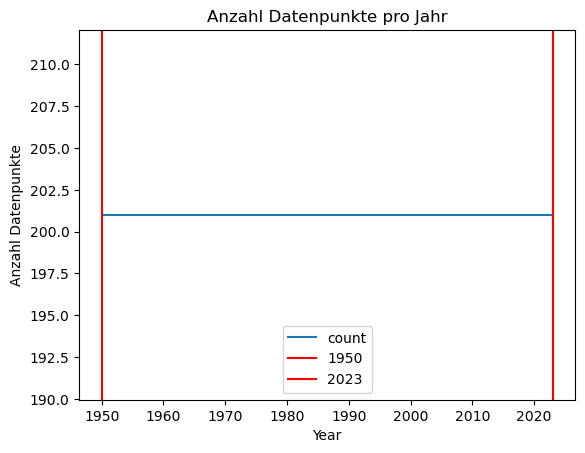

In [175]:
# Jahre mit maximaler Anzahl Datenpunkte (201)
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1950, color='red', label='1950')        #rote Linie bei 1950 - Start der Aufzeichnung
g.axvline(x=2023, color='red', label='2023')        #rote Linie bei 2023 - Ender der Aufzeichnung 
g.legend()

### 3.5 Analyse Geburtenrate pro 1000 Population (Birth rate)

In [176]:
df.describe

<bound method NDFrame.describe of             Entity Code  Year  Birth rate per 1000 population
0      Afghanistan  AFG  1950                          49.380
1      Afghanistan  AFG  1951                          49.624
2      Afghanistan  AFG  1952                          49.784
3      Afghanistan  AFG  1953                          49.979
4      Afghanistan  AFG  1954                          50.004
...            ...  ...   ...                             ...
14869     Zimbabwe  ZWE  2019                          31.121
14870     Zimbabwe  ZWE  2020                          30.988
14871     Zimbabwe  ZWE  2021                          30.932
14872     Zimbabwe  ZWE  2022                          30.882
14873     Zimbabwe  ZWE  2023                          30.410

[14874 rows x 4 columns]>

In [177]:
max_value = df['Birth rate per 1000 population'].max()
min_value = df['Birth rate per 1000 population'].min()

print(f'Das Maximum ist: {max_value}')
print(f'Das Minimum ist: {min_value}')

Das Maximum ist: 58.627
Das Minimum ist: 4.211


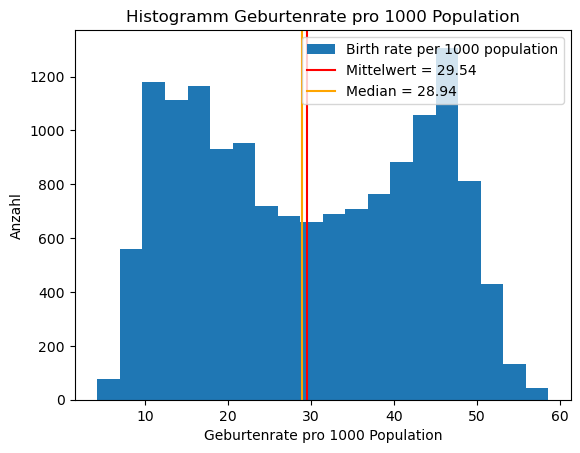

In [182]:
g = df['Birth rate per 1000 population'].plot(kind='hist', bins =20, title= 'Histogramm Geburtenrate pro 1000 Population',                           
                          xlabel= 'Geburtenrate pro 1000 Population', ylabel= 'Anzahl')
mean= df['Birth rate per 1000 population'].mean()
g.axvline(x=df['Birth rate per 1000 population'].mean(), color='red' ,label= f'Mittelwert = {mean:.2f}')       #rote Linie bei Mittelwert

median= df['Birth rate per 1000 population'].median()
g.axvline(x=df['Birth rate per 1000 population'].median(), color='orange' ,label= f'Median = {median:.2f}')     #orange Linie bei Median

g.legend()   

## 4. Analyse

### Vorgehen

Wie wir beim Punkt 3.3 aufgezeigt haben, beinhaltet unser Datensatz genau gleich viele Codes wie Ethnien. Deshalb analysieren wir ab hier nur noch mit den Codes.

Als erstes erstellen wir eine Pivot-Tabelle mit den Jahren und den dazugehörigen Geburtenraten pro 1000 Population. Danach zeigen wir dies in einem Diagramm auf. Wir analysieren in welchen Jahren, die Geburtenraten speziell gestiegen oder gesunken sind. Ebenfalls möchten wir die Differenzen zwischen den Jahren mit den meisten Geburten und die Jahre mit den wenigsten Geburten berechnen. In unserer Interpretation finden Sie die möglichen Gründe dafür, welche anhand von Quellen untersucht wurden.

### Beobachtung

### Interpretation (qzelle!)

## Erste Visualisierung

In [183]:
df_pivot = df.pivot(index='Year', columns='Code', values='Birth rate per 1000 population')
df_pivot.head()


Code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VAT,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1950,41.571,49.380,44.290,50.929,39.298,15.345,45.566,26.037,34.479,36.547,...,7.471,52.251,46.802,38.776,41.617,53.443,52.763,40.964,50.110,50.287
1951,40.896,49.624,45.015,51.237,39.659,16.850,44.194,25.945,35.170,36.192,...,7.578,51.936,47.208,34.849,42.230,53.447,53.251,41.090,49.798,49.950
1952,40.129,49.784,46.163,51.643,39.790,16.899,43.069,25.790,35.791,35.948,...,7.712,51.691,47.460,40.712,42.848,53.419,53.665,41.120,49.642,49.554
1953,39.126,49.979,47.224,51.289,40.692,16.663,42.133,25.601,36.511,35.731,...,7.866,51.422,47.557,38.962,43.413,53.221,54.028,41.076,49.502,49.201
1954,38.030,50.004,48.186,50.046,41.433,15.891,41.436,25.342,37.302,35.676,...,8.021,51.148,47.537,42.425,43.970,53.013,54.393,40.936,49.340,48.855


In [184]:
pivot_table = pd.pivot_table(df,
                             values='Birth rate per 1000 population',
                             index='Year',
                             aggfunc='sum')
print(pivot_table)

      Birth rate per 1000 population
Year                                
1950                        7897.563
1951                        7876.253
1952                        7899.769
1953                        7895.823
1954                        7901.272
...                              ...
2019                        3861.075
2020                        3779.491
2021                        3722.471
2022                        3644.367
2023                        3588.571

[74 rows x 1 columns]


Text(0, 0.5, 'Summe der Geburtenraten pro Jahr')

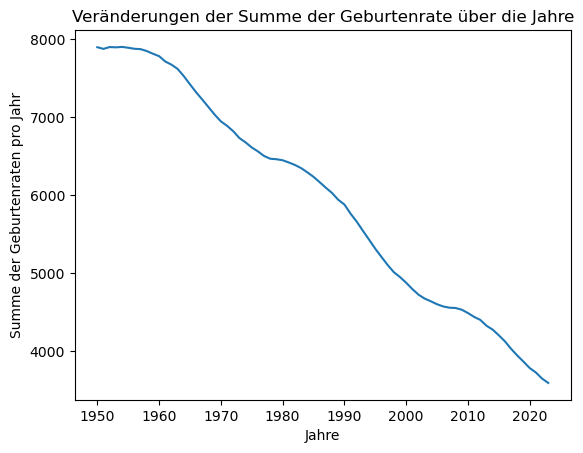

In [185]:
pivot_table.plot(kind='line', legend=False)
plt.title('Veränderungen der Summe der Geburtenrate über die Jahre')
plt.xlabel('Jahre')
plt.ylabel('Summe der Geburtenraten pro Jahr')

## Berechnungen

In [186]:
print(pivot_table.columns)

Index(['Birth rate per 1000 population'], dtype='object')


In [187]:
diffs= pivot_table.loc[1950]- pivot_table.loc[2023]
diffs = diffs.sort_values().dropna()
print(diffs)

Birth rate per 1000 population    4308.992
dtype: float64


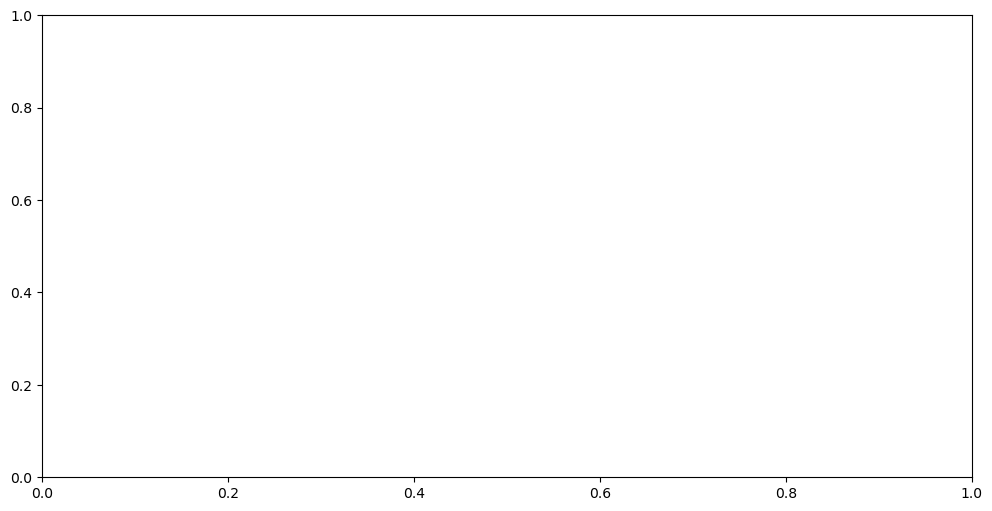

In [139]:
births_1950=pivot_table.loc[1950]      #Geburtsraten-Daten vorbereiten von 1950
births_2023=pivot_table.loc[2023]       #Geburtsraten-Daten vorbereiten von 2023
diffs= births_1950 - births_2023

data= pd.DataFrame({                    #DataFrame für die Gfrafik erstellen
    '1950': births_1950,
    '2023': births_2023,
    'Differenz': diffs})

fig, ax = plt.subplots(figsize=(12,6))          #Plot erstellen

data[['1950','2023']].plot.(kind='bar', ax=ax, width=0.8)
ax.set_ylabel

## Visualisierung